In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud #词云图
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer #词袋模型自然语言
from sklearn.feature_extraction.text import TfidfVectorizer#TF-IDF自然语言

In [3]:
text_ana = pd.read_csv(r'E:\[- -] C\文本数据分析\搜狗全网新闻数据_utf-8_demo.csv',index_col=0,encoding='GBK')
text_ana

,contenttitle,content
url,,
http://news.sohu.com/20120612/n345428229.shtml,公安机关销毁１０余万非法枪支 跨国武器走私渐起,中广网唐山６月１２日消息（记者汤一亮 庄胜春）据中国之声《新闻晚高峰》报道，今天（１２日）上...
http://news.sohu.com/20120607/n344998325.shtml,张绍刚发道歉信网友不认可：他的问题是俯视他人（图）,天津卫视求职节目《非你莫属》“晕倒门”事件余波未了，主持人张绍刚前日通过《非你莫属》节目组发...
http://news.sohu.com/20120604/n344745879.shtml,＃（关注夏收）（３）夫妻“麦客”忙麦收,临沂（山东），２０１２年６月４日 夫妻“麦客”忙麦收 ６月４日，在山东省临沂市郯城县郯城街道...
http://news.sohu.com/20120613/n345535702.shtml,欧洲杯大战在即 荷兰葡萄牙面临淘汰将背水一战,中广网北京６月１３日消息（记者王宇）据中国之声《新闻晚高峰》报道，明天凌晨两场欧洲杯的精彩比...
http://news.sohu.com/20120601/n344598651.shtml,扎克伯格携妻罗马当街吃３０元麦当劳午餐（组图）,环球网记者李亮报道，正在意大利度蜜月的“脸谱”创始人扎克伯格与他华裔妻子的一举一动都处于媒体...
...,...,...
http://news.cn.yahoo.com/ypen/20120531/1082314.html,联合国秘书长敦促叙利亚政府履行安南和平计划,中新网５月３１日电 据外电报道，联合国秘书长潘基文３１日敦促叙利亚政府尊重承诺，履行叙危机联...
http://news.cn.yahoo.com/ypen/20120531/1082438.html?f=E61_24_15,武汉一环卫工人因“占道”遭围殴 被泼滚烫米粉,荆楚网消息（记者张扬 通讯员殷莉红、刘永慧、刘妮）５月３１日，３名男子因嫌环卫车占道，竟将一...
http://news.cn.yahoo.com/newspic/news/23261/,女大学生夜行遇劫 遭割喉身亡（,NaN


In [4]:
text = list(text_ana['content'])
text

['中广网唐山６月１２日消息（记者汤一亮\u3000庄胜春）据中国之声《新闻晚高峰》报道，今天（１２日）上午，公安机关２０１２年缉枪制爆专项行动“统一销毁非法枪爆物品活动”在河北唐山正式启动，１０万余只非法枪支、２５０余吨炸药在全国１５０个城市被统一销毁。；泼鳎合衷谖倚布，全国缉枪制爆统一销毁行动开始！Ｋ孀殴安部副部长黄明一声令下，大量仿制式枪以及猎枪、火药枪、气枪在河北唐山钢铁厂被投入炼钢炉。与此同时，在全国各省区市１５０个城市，破案追缴和群众主动上缴的１０万余支非法枪支被集中销毁，在全国各指定场所，２５０余吨炸药被分别销毁。公安部治安局局长刘绍武介绍，这次销毁的非法枪支来源于三个方面。Ａ跎芪洌捍蚧髌瓢赴括涉黑、涉恶的团伙犯罪、毒品犯罪，还有从境外非法走私的枪支爆炸物。Ｔ谙毁现场，记者看到了被追缴和上缴的各式各样的枪支。Ａ跎芪洌阂舶括制式枪，有的是军用枪、仿制的制式抢，还有猎枪、私制的火药枪等等。按照我国的枪支管理法，这些都是严厉禁止个人非法持有的。中国是世界上持枪犯罪的犯罪率最低的国家之一。Ｖ忻懒手破获特大跨国走私武器弹药案＝日，中美执法部门联手成功破获特大跨国走私武器弹药案，在中国抓获犯罪嫌疑人２３名，缴获各类枪支９３支、子弹５万余发及大量枪支配件。在美国抓获犯罪嫌疑人３名，缴获各类枪支１２支。这是公安部与美国移民海关执法局通过联合调查方式侦破重大跨国案件的又一成功案例。＃玻埃保蹦辏冈拢玻等眨上海浦东国际机场海关在对美国纽约发往浙江台州，申报品名为扩音器（音箱）的快件进行查验时，发现货物内藏有手枪９支，枪支配件９件，长枪部件７件。经检验，这些都是具有杀伤力的制式枪支及其配件。这引起了公安部和海关总署的高度重视。９安部刑侦局局长刘安成：因为是从海关进口的货物中检查出来夹带，说明来源地是境外，或是说国外，这应该是一起特大跨国走私武器弹药的案件。Ｉ虾Ｊ泄安局和上海海关缉私局成立联合专案组，迅速开展案件侦查。专案组于８月２６日在浙江台州ＵＰＳ取件处将犯罪嫌疑人王挺（男，３２岁，台州市人）抓获。王挺交代，他通过一境外网站上认识了上家林志富，２００９年１１月以来，林志富长期居住美国，他通过互联网组建了一个走私、贩卖、私藏枪支弹药的群体，通过网络在国内寻找枪支弹药买家，并通过美国ＵＰＳ联邦速递公司将枪支弹药从纽约快递给多名类似王挺的中间人，再通过中间人发送给国内买家。４税钢

In [5]:
import jieba

def word_segmentation(text):
    words = jieba.lcut(text)
    return ' '.join(words)

text_ana['content'] = text_ana['content'].astype(str).apply(word_segmentation)
text_ana['content'].head()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\BITTER~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.579 seconds.
Prefix dict has been built successfully.


url
http://news.sohu.com/20120612/n345428229.shtml    中广网 唐山 ６ 月 １ ２ 日 消息 （ 记者 汤一亮 　 庄胜春 ） 据 中国 之声 《...
http://news.sohu.com/20120607/n344998325.shtml    天津 卫视 求职 节目 《 非你莫属 》 “ 晕倒 门 ” 事件 余波 未了 ， 主持人 张...
http://news.sohu.com/20120604/n344745879.shtml    临沂 （ 山东 ） ， ２ ０ １ ２ 年 ６ 月 ４ 日 　 夫妻 “ 麦客 ” 忙 麦收...
http://news.sohu.com/20120613/n345535702.shtml    中广网 北京 ６ 月 １ ３ 日 消息 （ 记者 王宇 ） 据 中国 之声 《 新闻 晚 高...
http://news.sohu.com/20120601/n344598651.shtml    环球网 记者 李亮 报道 ， 正在 意大利 度蜜月 的 “ 脸谱 ” 创始人 扎克 伯格 与...
Name: content, dtype: object

In [6]:
text = list(text_ana['content'].dropna())
text

['中广网 唐山 ６ 月 １ ２ 日 消息 （ 记者 汤一亮 \u3000 庄胜春 ） 据 中国 之声 《 新闻 晚 高峰 》 报道 ， 今天 （ １ ２ 日 ） 上午 ， 公安机关 ２ ０ １ ２ 年缉枪 制爆 专项 行动 “ 统一 销毁 非法 枪爆 物品 活动 ” 在 河北 唐山 正式 启动 ， １ ０ 万余只 非法 枪支 、 ２ ５ ０ 余吨 炸药 在 全国 １ ５ ０ 个 城市 被 统一 销毁 。 ； 泼 鳎 合衷 谖 倚布 ， 全国 缉枪 制爆 统一 销毁 行动 开始 ！ Ｋ 孀 殴安 部副 部长 黄明 一声令下 ， 大量 仿制 式 枪 以及 猎枪 、 火药枪 、 气枪 在 河北 唐山 钢铁厂 被 投入 炼钢炉 。 与此同时 ， 在 全国 各 省区市 １ ５ ０ 个 城市 ， 破案 追缴 和 群众 主动 上缴 的 １ ０ 万余支 非法 枪支 被 集中 销毁 ， 在 全国 各 指定 场所 ， ２ ５ ０ 余吨 炸药 被 分别 销毁 。 公安部 治安 局局长 刘 绍武 介绍 ， 这次 销毁 的 非法 枪支 来源于 三个 方面 。 Ａ 跎 芪 洌 捍 蚧 髌 瓢 赴括 涉黑 、 涉恶 的 团伙 犯罪 、 毒品 犯罪 ， 还有 从 境外 非法 走私 的 枪支 爆炸物 。 Ｔ 谙毁 现场 ， 记者 看到 了 被 追缴 和 上缴 的 各式各样 的 枪支 。 Ａ 跎 芪 洌 阂 舶括 制式 枪 ， 有的是 军用 枪 、 仿制 的 制式 抢 ， 还有 猎枪 、 私制 的 火药枪 等等 。 按照 我国 的 枪支 管理法 ， 这些 都 是 严厉 禁止 个人 非法 持有 的 。 中国 是 世界 上 持枪 犯罪 的 犯罪率 最低 的 国家 之一 。 Ｖ 忻懒手 破获 特大 跨国 走私 武器弹药 案 ＝ 日 ， 中 美 执法 部门 联手 成功 破获 特大 跨国 走私 武器弹药 案 ， 在 中国 抓获 犯罪 嫌疑人 ２ ３ 名 ， 缴获 各类 枪支 ９ ３ 支 、 子弹 ５ 万余 发及 大量 枪支 配件 。 在 美国 抓获 犯罪 嫌疑人 ３ 名 ， 缴获 各类 枪支 １ ２ 支 。 这是 公安部 与 美国移民 海关 执法局 通过 联合 调查 方式 侦破 重大 跨国 案件 的 又 一 成功 案例 。 ＃ 玻埃保 蹦 辏 冈 拢 玻 等 眨 上海浦东国际机场 海关 在 对 美国纽约 发 

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# 初始化CountVectorizer
vectorizer = CountVectorizer()

# 将文本数据转换为词袋特征矩阵
X = vectorizer.fit_transform(text)

# 展示特征矩阵的形状
print('词袋特征矩阵的形状:', X.shape)

词袋特征矩阵的形状: (99, 6374)


In [8]:
# 展示词袋模型中的所有特征词
print('特征词列表:', vectorizer.get_feature_names_out())

特征词列表: ['nan' '一万余' '一下' ... '龙头' '龙藏' '龙骨']


In [9]:
# 获取词汇表
feature_words = vectorizer.get_feature_names_out()

# 计算词频统计
word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

In [10]:
# 词袋模型中不重复的词汇的数量
len(word_freq)

6374

In [11]:
# 观察词袋模型的词频计数结果
sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

[('投资', 119),
 ('银行', 100),
 ('市场', 75),
 ('经济', 73),
 ('记者', 73),
 ('企业', 71),
 ('表示', 69),
 ('中国', 67),
 ('目前', 64),
 ('公司', 60),
 ('利率', 60),
 ('存款', 58),
 ('发展', 53),
 ('进行', 48),
 ('万元', 45),
 ('我们', 45),
 ('资金', 45),
 ('没有', 44),
 ('认为', 44),
 ('基金', 43),
 ('规定', 43),
 ('通过', 43),
 ('收益', 41),
 ('文化', 41),
 ('生产', 39),
 ('政府', 38),
 ('风险', 38),
 ('产品', 37),
 ('制度', 37),
 ('政策', 37),
 ('管理', 37),
 ('贷款', 37),
 ('食品安全', 37),
 ('亿元', 36),
 ('需求', 36),
 ('出现', 35),
 ('可以', 35),
 ('工作', 35),
 ('已经', 35),
 ('建设', 35),
 ('一个', 34),
 ('价格', 34),
 ('服务', 34),
 ('资产', 34),
 ('问题', 34),
 ('基本', 33),
 ('大连', 33),
 ('部门', 33),
 ('降息', 33),
 ('单位', 32),
 ('情况', 32),
 ('监管', 32),
 ('相关', 32),
 ('今年', 31),
 ('信托', 31),
 ('国家', 31),
 ('开放', 31),
 ('同时', 30),
 ('成为', 30),
 ('我国', 30),
 ('方式', 29),
 ('其中', 28),
 ('国内', 28),
 ('国际', 28),
 ('如果', 28),
 ('开始', 28),
 ('电价', 28),
 ('要求', 28),
 ('需要', 28),
 ('出口', 27),
 ('安全', 27),
 ('新区', 27),
 ('理财产品', 27),
 ('美国', 27),
 ('食品', 27),
 ('他们', 26),
 ('基准利

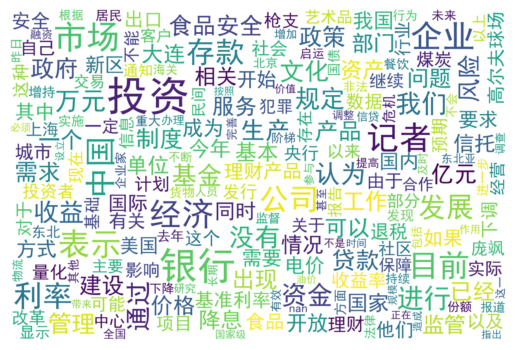

In [12]:
# 根据词袋模型分析结果绘制词云图
wordcloud = WordCloud(
    font_path='simhei.ttf',  # 指定中文字体文件路径
    background_color='white',  # 设置背景颜色
    width=1200,
    height=800,
    max_words=200,  # 设置最大显示的词数
    max_font_size=100  # 设置字体最大值
).generate_from_frequencies(word_freq)

# 显示词云图
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()